# Lezione 06

Consideriamo un modello di Ising 1D di $N=50$ spin con interazione primi vicini. La sua Hamiltoniana, nelle unità $k_B=1$ e $\mu _B=1$, è data da:
$$
H = -j\sum _{i=1} ^Ns_is_{i+1} - h\sum _{i=1} ^N s_i.
$$
dove gli spin $s_i$ prendono valori in  $\{+1,-1\}$. Poniamo  $j=1$ e la condizione al bordo $s_{N+1}=s_1$. 

Per tale sistema è possibile calcolare in modo esatto la funzione di partizione e quindi l'energia di Helmoltz e da essa si possono ottenere le espressioni analitiche delle seguenti grandezze termodinamiche in funzione di T: energia $U(N,T,h=0)$, calore specifico $C(N,T,h=0)$, magnetizzazione $M(N,t,h=0.02)$
e suscettività maegnitca $\chi (N,T,h=0)$.  

L'obiettivo di questa lezione è calcolare le precedenti grandezze termodinamiche in funzione della temperatura con il metodo Monte Carlo e confrontare i risultati con le soluzioni analitiche. Come range di temperature scegliamo $T \in [0.5,2]$. 

Lo spazio delle configurazioni possibili del sistema è dato delle $2^N$ possibli di sequenze di spin $\{s_i\}_{i=1} ^N$. La probabilità su questo spazio è la misuara di Boltzmann $\rho _B(\{s_i\}) = e^{-\beta H}/Z$. Per calcolare medie Monte Carlo è necessario generare un campione di configurazioni secondo la distribuione $\rho _B$. Questo è stato ottenuto mediante Gibbs sampling e l'algoritmo Metropolis.  

Prima raccogliere configurazioni del sistema per il calcolo delle medie Monte Carlo è necessario equilibrare il sistema. 


## Equilibrazione

Per ottenere il tempo di equilibrazione osserviamo l'andamento di $U$ ed $M$ con il numero di time step. Sia per l'algoritmo Metropolis che per il Gibbs sampling osserviamo l'andamento di queste osservabili per $T=0.5$ e per $T=2$. In tutti i casi usiamo $h=0$. La configurazione iniziale del sistema è una configurazione di spin random.

### Metropolis

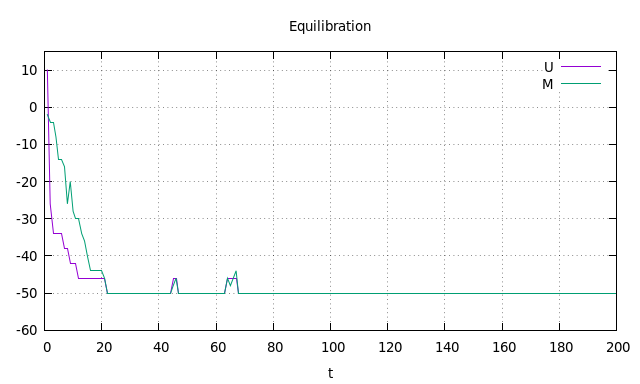

In [18]:
# T=0.5 h=0 METROPOLIS

from IPython.display import Image
i = Image(filename = 'eq_T0.5_h0_m.png') #immagine ottenuta con gnuplot
i

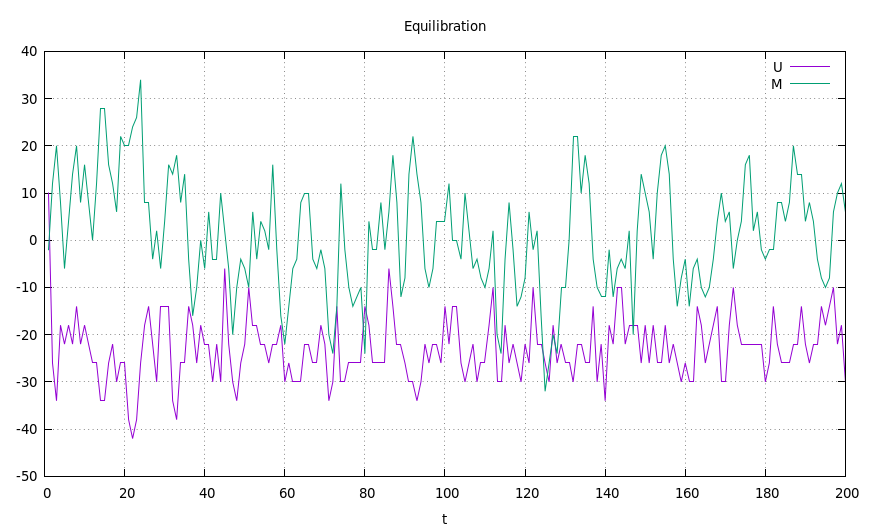

In [3]:
# T=2 h=0 METROPOLIS

from IPython.display import Image
i = Image(filename = 'eq_T2_h0_m.png') #immagine ottenuta con gnuplot
i

Nel caso del sampling con l'algoritmo Metropolis scegliamo $t_{\text{eq}}=50$ come tempo di equilibrazione. 

### Gibbs

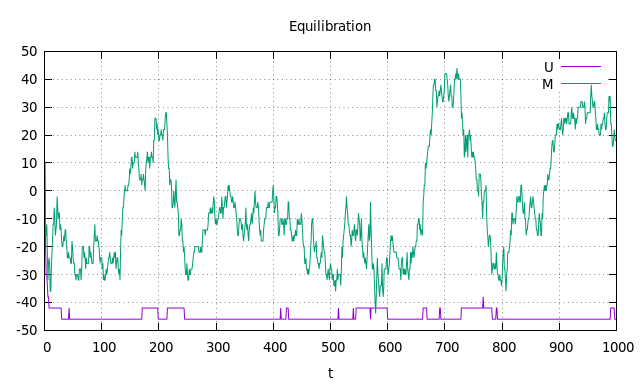

In [5]:
# T=0.5 h=0 GIBBS

from IPython.display import Image
i = Image(filename = 'eq_T0.5_h0_gibbs.png') #immagine ottenuta con gnuplot
i

In questo caso si osservano grandi oscillazioni nella magnetizzazione che rendono difficile determinare quando il sistema abbia raggiunto l'equilibrio. Allora per $T=0.5$ osservo l'andamento di $U$ e $M$ per $h=0.02$.

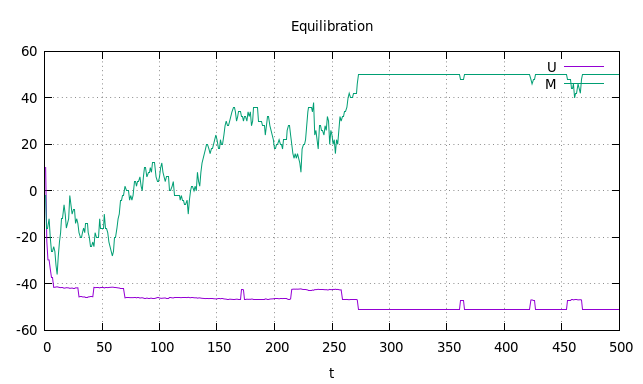

In [1]:
# # T=0.5 h=0.02 GIBBS

from IPython.display import Image
i = Image(filename = 'eq_T0.5_h0.02_gibbs.png') #immagine ottenuta con gnuplot
i

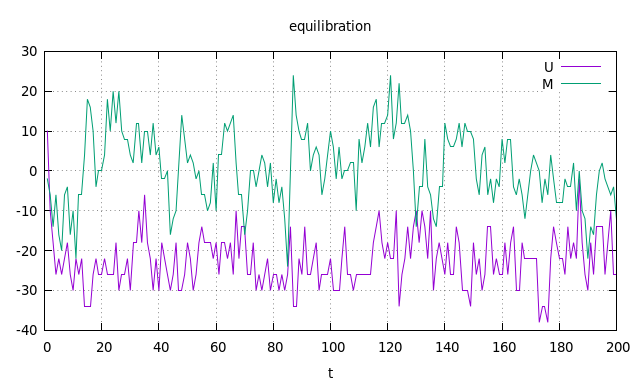

In [8]:
# T=2 h=0 GIBBS

from IPython.display import Image
i = Image(filename = 'eq_T2_h0_gibbs.png') #immagine ottenuta con gnuplot
i

Per il Gibbs sampling scegliamo $t_{\text{eq}}=300$.

## Simulazioni Monte Carlo

Per studiare la dipendenza dalla temperatura delle osservabili considerate dividiamo l'intervallo di temperature $[0.5,2]$ in 30 intevalli. 
Per ciascuana temperatura di questa partizione viene eseguita una simulazione Monte Carlo nella quale, dopo l'equilibrazione, viene creato un campione di $2\cdot 10^5$ configurazioni del sistema, utilizzando la distribuzione $\rho _B(\{s_i\}; T)$ corrispondente alla temperatura considerata. 
Suddividendo ogni campione in 20 blocchi e servendosi del datablock vengono calcolate le medie e incertezze delle osservabili. 
Raccongliendo le stime ottenute per tutte le temperature è possibile ricosruire la dipendenza funzionale delle osservabili rispetto alla temperatura. Tali dipendenze sono state ricostruite sia utilizzando l'algoritmo Metropolis, sia il Gibbs sampling e sono state messe a confronto con le formule analitiche. Nelle figure seguenti viene illustrato questo confronto.

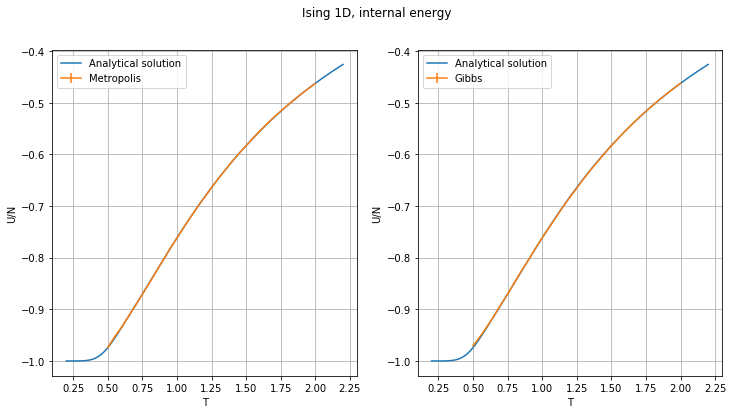

In [5]:
import numpy as np
import matplotlib.pyplot as plt


Tm, Em, Eem, Hm, Hem, Xm, Xem = np.loadtxt("TEHX.dat", usecols=(0,1,2,3,4,5,6), unpack = True )
Tm, Mm, Mem = np.loadtxt("TM.dat", usecols=(0,1,2), unpack = True )

Tg, Eg, Eeg, Hg, Heg, Xg, Xeg = np.loadtxt("TEHX_gibbs.dat", usecols=(0,1,2,3,4,5,6), unpack = True )
Tg, Mg, Meg = np.loadtxt("TM_gibbs.dat", usecols=(0,1,2), unpack = True )


#internal energy per spin

points=100
T = np.linspace(0.2,2.2,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th
e = -J*( th + ch*thN )/( 1 + thN )

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(T, e, label='Analytical solution')
plt.errorbar(Tm, Em, yerr=Eem, label='Metropolis')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('U/N')

plt.subplot(122)
plt.plot(T, e, label='Analytical solution')
plt.errorbar(Tg, Eg, yerr=Eeg, label='Gibbs')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('U/N')

plt.suptitle('Ising 1D, internal energy')
plt.show()

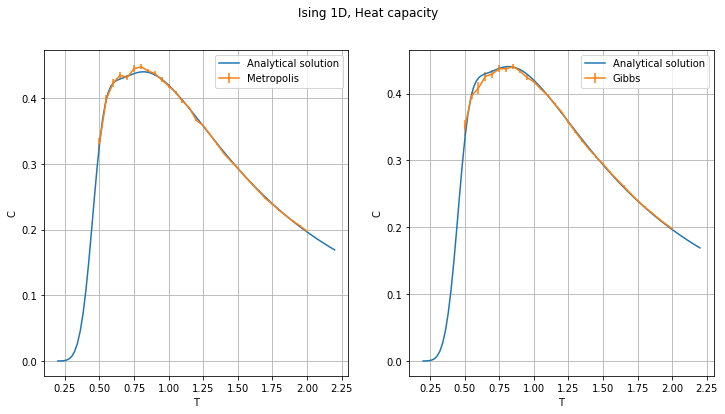

In [6]:
#heat capacity

heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(T, heat, label='Analytical solution')
plt.errorbar(Tm, Hm, yerr=Hem, label='Metropolis')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('C')

plt.subplot(122)
plt.plot(T, heat, label='Analytical solution')
plt.errorbar(Tg, Hg, yerr=Heg, label='Gibbs')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('C')

plt.suptitle('Ising 1D, Heat capacity')
plt.show()

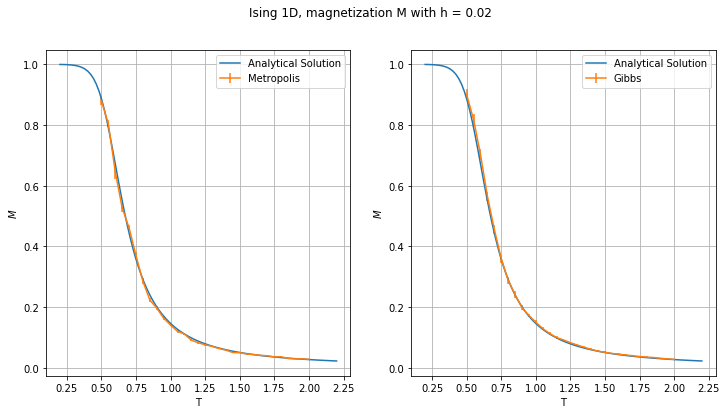

In [7]:
#magnetization

h=0.02
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(T, M,label='Analytical Solution')
plt.errorbar(Tm, Mm, yerr=Mem, label='Metropolis')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('$M$')

plt.subplot(122)
plt.plot(T, M,label='Analytical Solution')
plt.errorbar(Tg, Mg, yerr=Meg, label='Gibbs')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('$M$')


plt.suptitle('Ising 1D, magnetization M with h = 0.02')
plt.show()

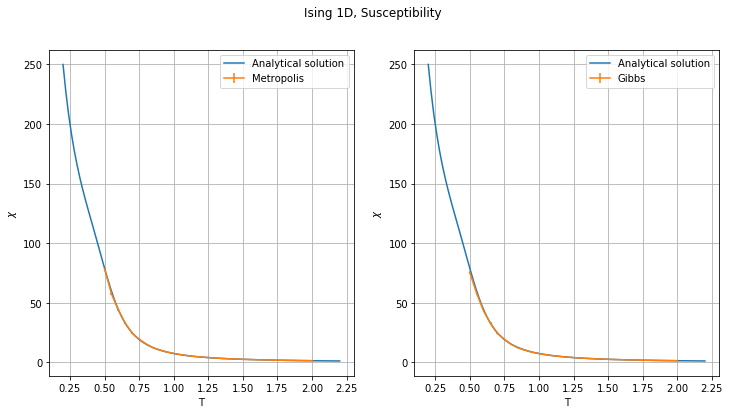

In [8]:
#susceptibility

X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.plot(T, X, label='Analytical solution')
plt.errorbar(Tm, Xm, yerr=Xem, label='Metropolis')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('$\chi$')

plt.subplot(122)
plt.plot(T, X, label='Analytical solution')
plt.errorbar(Tg, Xg, yerr=Xeg, label='Gibbs')
plt.grid(True)
plt.legend()
plt.xlabel('T')
plt.ylabel('$\chi$')

plt.suptitle('Ising 1D, Susceptibility')
plt.show()

In tutti i casi troviamo che c'è un buon accordo tra le soluzione analitiche e quelle numeriche.